# 第一节 概率计算

这一节主要介绍各种概率分布：二项分布、泊松分布、正态分布等等。具体概念这里不过多赘述，直接拿案例进行实验。

## 实验3-1 二项分布概率的计算

In [3]:
from scipy import stats

In [4]:
n = 6
p = 0.3

In [5]:
# 1.恰有4个顾客购买
k = 4
prob = stats.binom.pmf(k,n,p)
prob

0.05953499999999999

In [6]:
# 2.购买的顾客不超过一半
k = 3
prob = stats.binom.cdf(k,n,p)
prob

0.92953

In [7]:
# 3.至少有1个顾客购买，相当于1-没有买的的概率
k = 0
prob = 1 - stats.binom.cdf(k,n,p)
prob

0.882351

## 实验3-2 泊松分布概率计算

利用scipy统计模块计算泊松分布概率

某航空公司的订票处每60分钟有48次电话。求5分钟内接到3次电话的概率。

In [8]:
from scipy import stats

In [10]:
x = 3
mu =(48/60)*5
mu
# 注意mu的计算

4.0

In [11]:
prob = stats.poisson.pmf(x,mu)
prob

0.19536681481316454

## 超几何分布概率计算

In [12]:
from scipy import stats

In [13]:
N = 3
M = 10
n = 6
# n=6 这里是6人喜欢可口可乐的意思

In [14]:
# 1.恰有2人喜欢可口可乐的概率是多少？
k1 = 2
prob = stats.hypergeom.pmf(k1,M,n,N)
prob

0.4999999999999997

In [16]:
# 2或3个人喜欢百事可乐的概率是多少？
k1 = 2
k2 = 3
n = 4 
# n=6 这里是4人喜欢百事可乐的意思
prob = stats.hypergeom.pmf(k1,M,n,N) + stats.hypergeom.pmf(k2,M,n,N)
prob

0.3333333333333335

## 实验3-4 正态分布概率计算

In [17]:
from scipy import stats

In [18]:
mu = 26
sigma = 4

In [20]:
# 1.一个人第一次结婚时的年龄小于23岁的概率多大？
x1 = 23
prob = stats.norm.cdf(x1,mu,sigma)
prob

0.2266273523768682

In [21]:
# 2.一个人人第一次结婚时的年龄在20-30岁之间的概率多大？
x2 = 20
x3 = 30
prob = stats.norm.cdf(x3,mu,sigma) - stats.norm.cdf(x2,mu,sigma)
prob

0.7745375447996848

In [24]:
# 3.95%的人在什么年龄前第一次结婚
x4 = 0.95
prob = stats.norm.ppf(x4,mu,sigma)
prob

32.579414507805886

## 实验3-5 卡方分布概率计算

## 实验3-6 t分布概率计算

# 实验3-7 F分布概率计算

## 实验3-8 排列组合与阶乘函数计算概率

n个人，求至少两人生日相同（设为事件A）的概率

In [27]:
import math
from scipy import special

In [29]:
# 假设有64个同学，即 n=64
n = 64
prob = 1 - special.comb(365,n) * math.factorial(n) / 365 ** n
prob
# 说明只要有64人，那么至少有2人生日相同概率几乎为1

0.997190478966976

## 实验3-9 概率密度函数图的绘制

绘制正态分布N(10,2)和N(12,3)的概率密度函数图

In [31]:


import pandas as pd
import numpy as np

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.rcParams['savefig.dpi'] = 100 # 图片质量

In [41]:
mu1 = 10
sigma1 = 2
mu2 = 12
sigma2 = 3

In [45]:
# 定义函数求概率密度，这个函数其实就是正态分布的公式
def norm_fun(x,mu,sigma):
    return np.exp(-((x - mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

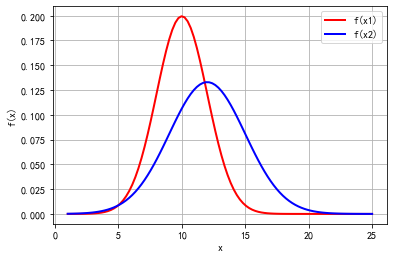

In [44]:
# 画图
x = np.linspace(1,25,100)
y1 = norm_fun(x,mu1,sigma1)
y2 = norm_fun(x,mu2,sigma2)

fig,ax = plt.subplots()
ax.plot(x,y1,"r-",linewidth=2,label='f(x1)')
ax.plot(x,y2,"b-",linewidth=2,label='f(x2)')
ax.set(ylabel='f(x)',xlabel='x')
ax.legend()
ax.grid(True)

# 第二节 随机抽样

## 实验3-10 使用随机数发生器创建随机数

创建取值分别为1，2，,3,4，相应概率为0.3,0.2,0.1,0.4的概率分布下，15行8列的离散分布随机数表

In [ ]:
import numpy as np

In [47]:
np.random.choice([1,2,3,4], size=(15,8), p=[0.3,0.2,0.1,0.4])

array([[4, 3, 4, 4, 2, 1, 2, 1],
       [3, 2, 4, 4, 4, 2, 1, 4],
       [4, 2, 1, 1, 2, 3, 1, 1],
       [4, 4, 1, 2, 4, 2, 1, 4],
       [4, 2, 1, 1, 2, 1, 1, 1],
       [1, 4, 2, 4, 4, 4, 1, 1],
       [2, 2, 4, 1, 1, 4, 2, 4],
       [1, 1, 2, 1, 1, 1, 1, 4],
       [4, 1, 1, 4, 4, 4, 4, 1],
       [4, 1, 2, 4, 1, 1, 4, 1],
       [3, 1, 4, 4, 4, 2, 1, 4],
       [1, 2, 2, 4, 2, 1, 2, 4],
       [1, 1, 4, 3, 4, 1, 4, 3],
       [4, 2, 1, 2, 4, 4, 4, 3],
       [2, 4, 3, 4, 2, 2, 1, 1]])

## 实验3-11 使用随机数函数创建随机数

In [48]:
# 创建一组服从0-1均匀分布的随机数
np.random.rand(4,4)

array([[0.96217097, 0.98366955, 0.74277225, 0.60416228],
       [0.06235049, 0.74642095, 0.32462698, 0.69385062],
       [0.85452821, 0.12790053, 0.69142201, 0.24191518],
       [0.19062622, 0.65556837, 0.44151301, 0.7943343 ]])

In [49]:
# 创建一个均匀分布的，48个在[100,150)中的随机数
np.random.uniform(100,150,48)

array([116.76319916, 135.19370917, 109.63489242, 144.82287433,
       136.83623471, 105.72656478, 101.95467207, 130.47797445,
       131.04471831, 124.04200185, 112.66708126, 134.27049649,
       115.19391079, 143.9568004 , 115.83986507, 103.46374113,
       131.50326788, 107.43072546, 132.84189222, 127.73643143,
       112.44130568, 127.89727523, 110.67101175, 100.78853637,
       118.5169953 , 118.54264792, 146.05817162, 115.50604347,
       131.63951633, 113.06720324, 125.39585152, 114.22338753,
       121.31933932, 147.92981049, 118.1308307 , 140.90040844,
       146.10194269, 135.69761576, 128.46450351, 118.35484852,
       101.41365076, 114.91153316, 110.17305378, 139.27232063,
       116.49425751, 114.79169251, 131.29659205, 141.42651957])

## 实验3-12 正态分布的模拟

In [50]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
# loc参数代表均值，scale代表标准差，size代表数量
sample = np.random.normal(loc=0,scale=1,size=2000)
sample

array([-0.42170056, -0.44939553,  0.15702986, ...,  0.95759534,
       -0.01364779,  0.27112559])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  3.,  3.,
         4.,  7., 11., 13., 10., 21., 17., 16., 23., 26., 32., 43., 47.,
        48., 65., 66., 51., 62., 70., 74., 62., 78., 81., 90., 75., 74.,
        88., 74., 64., 75., 62., 68., 56., 45., 43., 43., 34., 21., 25.,
        28., 14., 20., 13.,  7.,  8.,  7.,  9.,  8.,  3.,  4.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
        -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
        -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
        -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
        -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
        -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, 

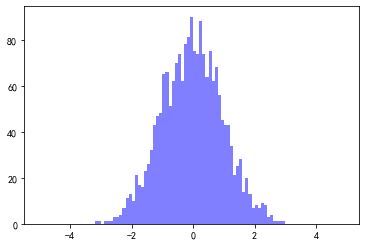

In [55]:
bins = np.arange(-5,5,0.1)
plt.hist(sample,bins,color='blue',alpha=0.5)

## 实验3-13 随机抽样

In [59]:
# 这个我照书上的简化了一下
import numpy as np
all = np.arange(1,20,2)
all

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [60]:
# 从all中随机抽3个数
np.random.choice(all,size=3)

array([17, 11,  7])